In the previous chapter, we introduced the concept of clustering and practiced it using 
k-means clustering – a simple and powerful approach to clustering that divides the 
data points into a pre-specified number of clusters. But we used several assumptions 
in the previous chapter. We created a pre-determined number of clusters, assuming 
that we had the right number of clusters with us, either from intuition or business 
constraints

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
pd.set_option('display.max_columns', 500)
%matplotlib inline


How do we choose the number of clusters?   
How do we evaluate the clusters statistically/numerically?  
Which is the best clustering algorithm for the task?  

### Choosing the Number of Clusters

First, we will 
learn about simple visual inspection, which has the advantages of being easy and 
intuitive but relies heavily on individual judgment and subjectivity. We will then learn 
about the elbow method with sum of squared errors, which is partially quantitative 
but still relies on individual judgment. We will also learn about using the silhouette 
score, which removes subjectivity from the judgment but is not a very intuitive metric.


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Mall_Customers.csv')

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.rename({'Annual Income (k$)': 'Income',
'Spending Score (1-100)' : 'spend_score'}, axis=1, inplace = True)

In [17]:
df.head()

,CustomerID,Gender,Age,Income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


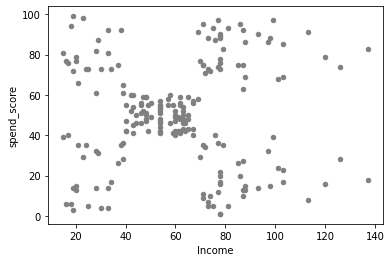

In [19]:
df.plot.scatter(x='Income', y='spend_score', color='gray')
plt.show()

#### Choosing the Number of Clusters Based on Visual Inspection

In [22]:
df_scaled = df.copy()
cols_to_scale = ['Age', 'Income','spend_score']

In [23]:
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [26]:
df_scaled[cols_to_scale].describe()
# to check if the mean is close to 0 and the std is close to 1

,Age,Income,spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [1]:
# after scaling comes PCA, depending on the number of dimensions, else do clustering
cluster_cols = ['Income', 'spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']
# seven markers because we are going to test the n_clusters in range(2, 8)

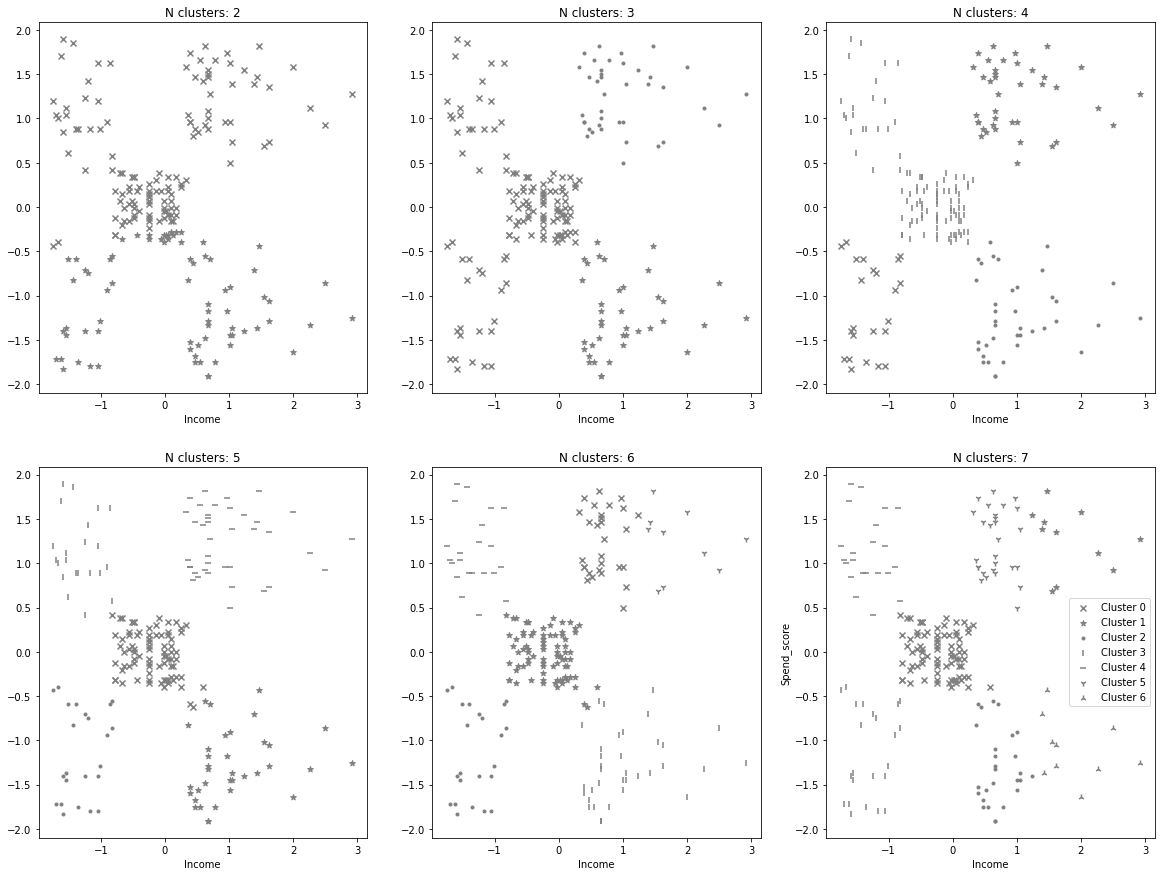

In [30]:
plt.figure(figsize=[20,15])
for i in range(2,8):
    model = KMeans(n_clusters=i, random_state=42)
    df_scaled['Cluster'] = model.fit_predict(df_scaled[cluster_cols])
    plt.subplot(2 , 3, i-1)
    for clust in range(i):
        temp = df_scaled[df_scaled['Cluster']==clust]
        plt.scatter(temp['Income'], temp['spend_score'], marker=markers[clust], label='Cluster '+str(clust), color='gray'
        )
        plt.title("N clusters: "+str(i))
        plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

Clearly, we can see visually that there are 5 clusters of mall customers

#### The Elbow Method with Sum of Squared Errors

In [39]:
df_scaled

,CustomerID,Gender,Age,Income,spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,3
1,2,Male,-1.281035,-1.738999,1.195704,4
2,3,Female,-1.352802,-1.700830,-1.715913,3
3,4,Female,-1.137502,-1.700830,1.040418,4
4,5,Female,-0.563369,-1.662660,-0.395980,3
...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,1
196,197,Female,0.441365,2.497807,-0.861839,6
197,198,Male,-0.491602,2.497807,0.923953,1
198,199,Male,-0.491602,2.917671,-1.250054,6


In [2]:
# We have a kmeans instance already with with our data, at the end of the for loop
model.inertia_
# we don't look at this number particularly, but we look at how this number changes 
# with the change in the n_clusters.

NameError: name 'model' is not defined

In [40]:
X = df_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

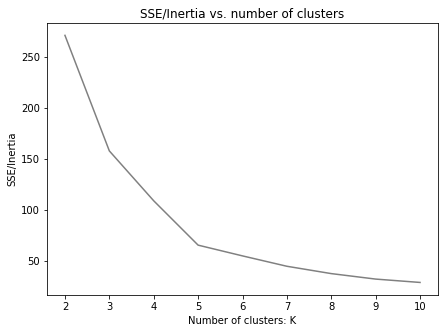

In [44]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

By observing the preceding plot, you will notice that there is an elbow in the 
plot at K=5. So, we take five as the optimal number of clusters, the best value 
of K for the KMeans algorithm. 